# そのまま回帰のテストに入る。

In [69]:
import pandas as pd
import numpy as np

#なぜかドットが1個じゃないと読み込めない時と、2個じゃないと読み込めない時がある。

df = pd.read_csv('../data/CASP/CASP.csv', header=0, )

#一列目がyで、ちょっとデータが多すぎるので15000個でテストをする。


X = df.iloc[:15000,1:]
y = df.iloc[:15000,[0]]

#check the shape
print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df.shape)
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print(X.dtypes)
print('----------------------------------------------------------------------------------------')
print('Check the null count of the target variable: %i' % y.isnull().sum())
print('----------------------------------------------------------------------------------------')

print('----------------------------------------------------------------------------------------')

print(y.head())
X.head()

----------------------------------------------------------------------------------------
Raw shape: (45730,10)
X shape: (15000,9)
y shape: (15000,1)
----------------------------------------------------------------------------------------
F1    float64
F2    float64
F3    float64
F4    float64
F5    float64
F6    float64
F7    float64
F8      int64
F9    float64
dtype: object
----------------------------------------------------------------------------------------
Check the null count of the target variable: 0
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
     RMSD
0  17.284
1   6.021
2   9.275
3  15.851
4   7.962


,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [70]:
# import basice apis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from skgarden.mondrian.ensemble import MondrianForestRegressor

# Holdout
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

# data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

#set learning machine
knr = KNeighborsRegressor()
rid = Ridge()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
mfr = MondrianForestRegressor()
mfr_p = MondrianForestRegressor()

次はtotalの計算時間を計算
ここでは、データが1000個ずつきて、順次学習していったと仮定する。

In [71]:
#各モデルのデータ数に対する計算速度を計測
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start

#各性能を調べると共に、スコアも調べる。

def calc_time_and_score(X_use, y_use, larener):
    n_list = []
    time_list = []
    total_time_list = []
    r2_list = []
    i = 0
    n = 0
    N = X_use.shape[0]
    calc_time = 0
    calc_time_total = 0
    r2_sco = 0
    while i < N:
        i += 100
        X_data = X_use[:i, :]    
        y_data = y_use[:i]
        calc_time = calc_function(larener.fit,(X_data,y_data.as_matrix().ravel()) )
        
        #データ数と計算時間、総計算時間を格納
        n = X_data.shape[0]
        n_list.append(n)
        time_list.append(calc_time)
        calc_time_total += calc_time 
        total_time_list.append(calc_time_total)
        
        r2_sco = r2_score(y_test.as_matrix().ravel(), larener.predict(X_test_scl))
        r2_list.append(r2_sco)
        
    n_array = np.array(n_list)
    time_array = np.array(time_list)
    total_time_array = np.array(total_time_list)
    r2_array = np.array(r2_list)
    
    return n_array, time_array, total_time_array, r2_array


In [72]:
result_knr = calc_time_and_score(X_train_scl,y_train, knr)
print('end')

end


In [73]:
result_rid = calc_time_and_score(X_train_scl,y_train, rid)
print('end')

end


In [74]:
result_rfr = calc_time_and_score(X_train_scl,y_train, rfr)
print('end')

end


In [75]:
result_gbr = calc_time_and_score(X_train_scl,y_train, gbr)
print('end')

end


In [76]:
result_mfr = calc_time_and_score(X_train_scl,y_train, mfr)
print('end')

end


In [77]:
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start
from skgarden.mondrian.ensemble import MondrianForestRegressor


#念のため学習器を再定義
mfr_p = MondrianForestRegressor()

#各性能を調べると共に、スコアも調べる。
n_list = []
time_list = []
total_time_list = []
r2_list = []
i = 0
n = 0
N = X_train_scl.shape[0]
calc_time = 0
calc_time_total = 0
r2_sco = 0
while i < N:
    i += 100
    X_data = X_train_scl[:i, :]    
    y_data = y_train[:i]
    calc_time = calc_function(mfr_p.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    
    #データ数と計算時間、総計算時間を格納
    n = X_data.shape[0]
    n_list.append(n)
    time_list.append(calc_time)
    calc_time_total += calc_time 
    total_time_list.append(calc_time_total)
    
    #R2スコアを計算
    r2_sco = r2_score(y_test.as_matrix().ravel(), mfr_p.predict(X_test_scl))
    r2_list.append(r2_sco)
    
    #学習器をリセット
    mfr_p = MondrianForestRegressor()
n_array = np.array(n_list)
time_array = np.array(time_list)
total_time_array = np.array(total_time_list)
r2_array = np.array(r2_list)
    
result_mfr_p = (n_array, time_array, total_time_array, r2_array)
print('end')

end


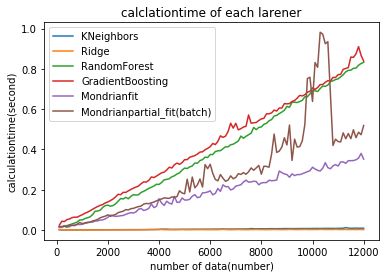

In [93]:
#学習器自体の性能を調べる計算時間のプロット
#partial_fitは毎回リセットし、ゼロから
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    o,p,q,r = result
    plt.plot(o, p, label=name)
result_plot(result_knr, 'KNeighbors')
result_plot(result_rid, 'Ridge')
result_plot(result_rfr, 'RandomForest')
result_plot(result_gbr, 'GradientBoosting')
result_plot(result_mfr, 'Mondrianfit')
result_plot(result_mfr_p, 'Mondrianpartial_fit(batch)')

plt.title('calclationtime of each larener')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('calclationtime of each larener', dpi=150)
plt.show()


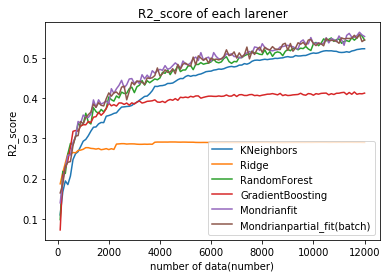

In [94]:
#学習器自体の性能を調べる計算時間のプロット
#partial_fitは毎回リセットし、ゼロから
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_sco(result, name):
    o,p,q,r = result
    plt.plot(o, r, label=name)
result_plot_sco(result_knr, 'KNeighbors')
result_plot_sco(result_rid, 'Ridge')
result_plot_sco(result_rfr, 'RandomForest')
result_plot_sco(result_gbr, 'GradientBoosting')
result_plot_sco(result_mfr, 'Mondrianfit')
result_plot_sco(result_mfr_p, 'Mondrianpartial_fit(batch)')

plt.title('R2_score of each larener')
plt.xlabel('number of data(number)')
plt.ylabel('R2_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('R2_score of each larener', dpi=150)
plt.show()


In [88]:
#データが100個ずつ来たと仮定した時のトータルの計算時間。
#他の学習器は100個足されるたびに学習して、Mondrianは100ごとに学習する。
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start
from skgarden.mondrian.ensemble import MondrianForestRegressor


#学習器を再定義
mfr_p_100 = MondrianForestRegressor()

#各性能を調べると共に、スコアも調べる。
n_list = []
time_list = []
total_time_list = []
r2_list = []
i = 0
n = 0
n_plus = 0
N = X_train_scl.shape[0]
calc_time = 0
calc_time_total = 0
r2_sco = 0
while i < N:
    i += 100
    X_data = X_train_scl[i-100:i, :]    
    y_data = y_train[i-100:i]
    calc_time = calc_function(mfr_p_100.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    
    #データ数と計算時間、総計算時間を格納
    n = X_data.shape[0]
    n_plus +=  n
    n_list.append(n_plus)
    time_list.append(calc_time)
    calc_time_total += calc_time 
    total_time_list.append(calc_time_total)
    
    #R2スコアを計算
    r2_sco = r2_score(y_test.as_matrix().ravel(), mfr_p_100.predict(X_test_scl))
    r2_list.append(r2_sco)
    #リセットはなし。
n_array = np.array(n_list)
time_array = np.array(time_list)
total_time_array = np.array(total_time_list)
r2_array = np.array(r2_list)
    
result_mfr_p_100 = (n_array, time_array, total_time_array, r2_array)
print('end')

end


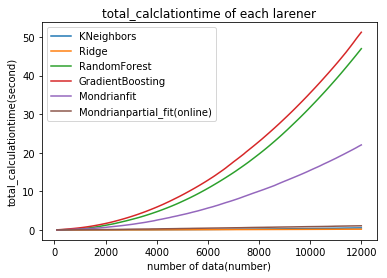

In [95]:
#学習器自体の性能を調べる計算時間のプロット
#partial_fitは毎回リセットし、ゼロから
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_total(result, name):
    o,p,q,r = result
    plt.plot(o, q, label=name)
result_plot_total(result_knr, 'KNeighbors')
result_plot_total(result_rid, 'Ridge')
result_plot_total(result_rfr, 'RandomForest')
result_plot_total(result_gbr, 'GradientBoosting')
result_plot_total(result_mfr, 'Mondrianfit')
result_plot_total(result_mfr_p_100, 'Mondrianpartial_fit(online)')

plt.title('total_calclationtime of each larener')
plt.xlabel('number of data(number)')
plt.ylabel('total_calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('total_calclationtime of each larener', dpi=150)
plt.show()


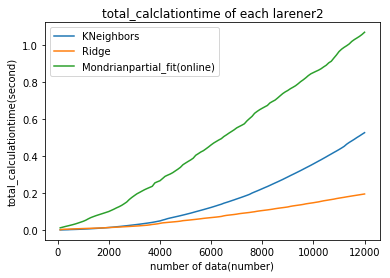

In [96]:
#学習器自体の性能を調べる計算時間のプロット
#partial_fitは毎回リセットし、ゼロから
#もはやわからないので、他のを抜く
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_total(result, name):
    o,p,q,r = result
    plt.plot(o, q, label=name)
result_plot_total(result_knr, 'KNeighbors')
result_plot_total(result_rid, 'Ridge')
result_plot_total(result_mfr_p_100, 'Mondrianpartial_fit(online)')

plt.title('total_calclationtime of each larener2')
plt.xlabel('number of data(number)')
plt.ylabel('total_calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('total_calclationtime of each larener2', dpi=150)
plt.show()


リッジ回帰とかめっちゃ早いですね。

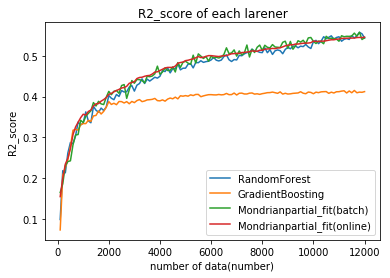

In [97]:
#学習器自体の性能を調べる計算時間のプロット
#partial_fitは毎回リセットし、ゼロから
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_sco(result, name):
    o,p,q,r = result
    plt.plot(o, r, label=name)
result_plot_sco(result_rfr, 'RandomForest')
result_plot_sco(result_gbr, 'GradientBoosting')
result_plot_sco(result_mfr_p, 'Mondrianpartial_fit(batch)')
result_plot_sco(result_mfr_p_100, 'Mondrianpartial_fit(online)')

plt.title('R2_score of each larener')
plt.xlabel('number of data(number)')
plt.ylabel('R2_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('R2_score of online', dpi=150)
plt.show()
